# Basic Classification Loss Functions

In this notebook, we explore the difference between the cross-entropy and KL divergence losses. We visualize these two metrics for multiple pairs of binomial distributions randign from identical to non-overalpping.

In [2]:
import functools
from scipy.stats import binom

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import rc, cm
plt.rcParams.update({'pdf.fonttype': 'truetype'})

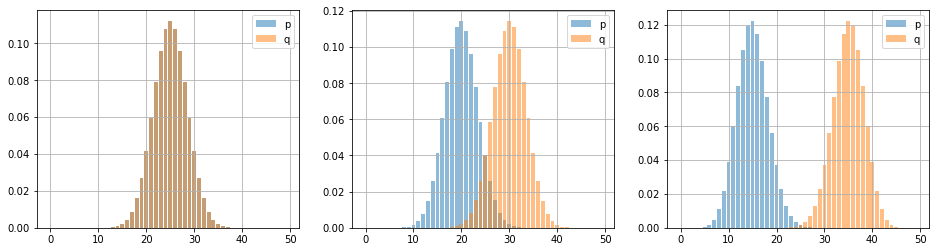

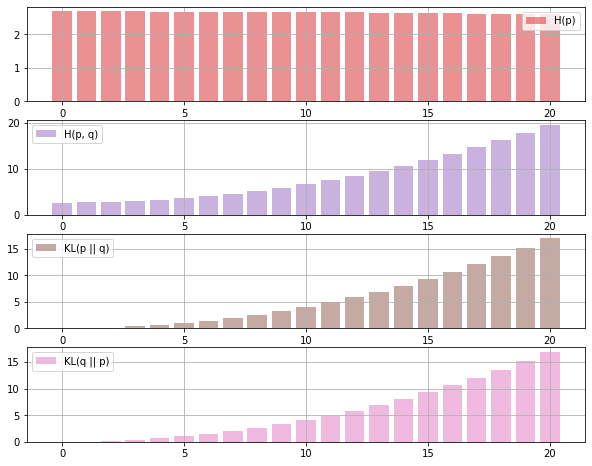

In [114]:
n0, p0 = 50, 0.5
x = np.arange(0, n0)

def entropy(p):
    return - np.sum(p * np.log(p))
    
def cross_entropy(p, q):
    return - np.sum(p * np.log(q))

def kl_divergence(p, q):
    return np.sum(p * np.log(p/q))

#
# Visualize examples of distributions
#
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
offsets = [0, 0.1, 0.2]
for i in range(3):
    p = binom.pmf(x, n0, p0 - offsets[i])
    q = binom.pmf(x, n0, p0 + offsets[i])

    ax[i].bar(x, p, alpha=0.5, label='p')
    ax[i].bar(x, q, alpha=0.5, label='q')
    ax[i].legend(loc='best')
    ax[i].grid(True)
    
#
# Visualize metrics for 21 different pairs of distributions
#
n_offsets = 21
ce, kl_pq, kl_qp, pe = [np.zeros(n_offsets) for i in range(4)]
offsets = np.linspace(0, 0.2, n_offsets)
for i in range(n_offsets):
    p = binom.pmf(x, n0, 0.5 - offsets[i])
    q = binom.pmf(x, n0, 0.5 + offsets[i])
    pe[i] = entropy(p)
    ce[i] = cross_entropy(p, q)
    kl_pq[i] = kl_divergence(p, q)
    kl_qp[i] = kl_divergence(q, p)

fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].bar(range(n_offsets), pe, alpha=0.5, color='C3', label = 'H(p)')
ax[1].bar(range(n_offsets), ce, alpha=0.5, color='C4', label = 'H(p, q)')
ax[2].bar(range(n_offsets), kl_pq, alpha=0.5, color='C5', label = 'KL(p || q)')
ax[3].bar(range(n_offsets), kl_qp, alpha=0.5, color='C6', label = 'KL(q || p)')
for i in range(4):
    ax[i].grid(True)
    ax[i].legend(loc='best')